# Project of analysis real data from Uber

## DataSet Overview

-  All data come from one source which was csv file from kaggle shared in the same folder and contains details in columns as following.
    - Request id: Serial number of each request    
    - Pickup point:  The location where the trip start 
    - Driver id	:    The id for each drive 
    - Status:  Status of the trip if it is completed, canceled, no available 
    - Request timestamp:  Time when the trip start
    - Drop timestamp:  Time when the trip end
    

In [80]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns # Data Visualization
sns.set() # Set seaborn plot style as defualt 

In [81]:
# Importing the dataset
dataset = pd.read_csv('Uber Request Data.csv')

In [82]:
# Display Frist 5 rows from dataframe
dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [83]:
# Information about data shape and types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [84]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format
dataset['Request timestamp']= dataset['Request timestamp'].apply(lambda x: pd.to_datetime(x))
dataset['Drop timestamp']= dataset['Drop timestamp'].apply(lambda x: pd.to_datetime(x))

In [85]:
#Extract the month from requested timestamp
dataset["Request month"] = dataset["Request timestamp"].dt.month

In [86]:
#Create column to day of week for each request
#Starting from Monday (Monday =0, Tuesday=1, Wednesday=2,Thursday =3,  Friday=4 ,  Saturday =5, Sunday =6)
dataset['Request dayofweek']= dataset['Request timestamp'].dt.dayofweek


In [87]:
#Extract the hour from requested timestamp
dataset["Request hour"] = dataset["Request timestamp"].dt.hour

In [88]:
dataset['Trip_Duration'] = dataset['Drop timestamp'].sub(dataset['Request timestamp'], axis = 0) 

In [89]:
# Information about data shape and types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Request id         6745 non-null   int64          
 1   Pickup point       6745 non-null   object         
 2   Driver id          4095 non-null   float64        
 3   Status             6745 non-null   object         
 4   Request timestamp  6745 non-null   datetime64[ns] 
 5   Drop timestamp     2831 non-null   datetime64[ns] 
 6   Request month      6745 non-null   int64          
 7   Request dayofweek  6745 non-null   int64          
 8   Request hour       6745 non-null   int64          
 9   Trip_Duration      2831 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(2), timedelta64[ns](1)
memory usage: 527.1+ KB


In [90]:
dataset

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request hour,Trip_Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,0,11,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,0,17,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2,9,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2,21,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,8,00:52:31
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,7,4,23,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,7,4,23,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,7,4,23,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,7,4,23,NaT


In [118]:
#Divide the time of the day into five categories
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [120]:
dataset['Time slot'] = dataset['Request hour'].apply(lambda x: time_period(x))
dataset.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request month,Request dayofweek,Request hour,Trip_Duration,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,0,11,01:09:00,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,11,0,17,00:50:00,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,12,2,9,00:41:00,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,12,2,21,00:55:00,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,7,2,8,00:52:31,Morning


In [91]:
#brief of the data summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Request id,6745,3384.64,1955.1,1,1691,3387,5080,6766
Driver id,4095,149.501,86.052,1,75,149,224,300
Request month,6745,8.77954,2.21833,7,7,7,11,12
Request dayofweek,6745,2.20474,1.33738,0,2,2,3,4
Request hour,6745,12.9567,6.50405,0,7,13,19,23
Trip_Duration,2831,-1 days +13:14:01.893323,10 days 07:07:51.550378,-148 days +00:33:55,0 days 00:41:00,0 days 00:52:05,0 days 01:04:00,29 days 01:15:00


In [92]:
dataset[dataset['Trip_Duration'] < '00:00:00'].count()

Request id           13
Pickup point         13
Driver id            13
Status               13
Request timestamp    13
Drop timestamp       13
Request month        13
Request dayofweek    13
Request hour         13
Trip_Duration        13
dtype: int64

In [93]:
index_wrongdate= dataset[dataset['Trip_Duration'] < '00:00:00'].index
dataset.drop(index_wrongdate, inplace= True)

In [95]:
dataset[dataset['Trip_Duration'] > '03:00:00'].count()

Request id           19
Pickup point         19
Driver id            19
Status               19
Request timestamp    19
Drop timestamp       19
Request month        19
Request dayofweek    19
Request hour         19
Trip_Duration        19
dtype: int64

In [111]:
index_wrongdate= dataset[dataset['Trip_Duration'] > '23:00:00'].index
dataset.drop(index_wrongdate, inplace= True)

In [98]:
dataset['Pickup point'].value_counts()

City       3496
Airport    3217
Name: Pickup point, dtype: int64

In [99]:
dataset['Status'].value_counts()

Trip Completed       2799
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [102]:
dataset['Request month'].value_counts()

7     4071
11    1348
12    1294
Name: Request month, dtype: int64

In [100]:
dataset['Request dayofweek'].value_counts()

2    2631
4    1381
3    1353
0    1348
Name: Request dayofweek, dtype: int64

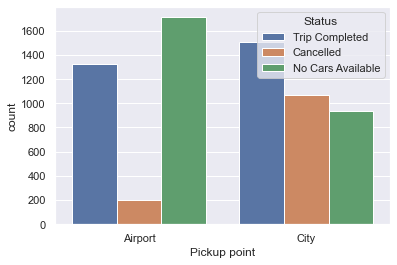

In [20]:
sns.countplot('Pickup point',data=dataset,hue='Status')

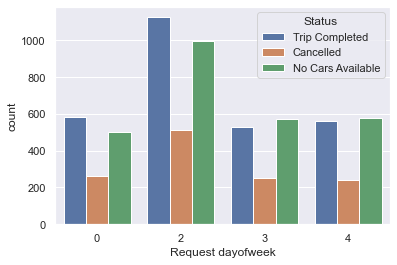

In [103]:
sns.countplot('Request dayofweek',data=dataset,hue='Status')

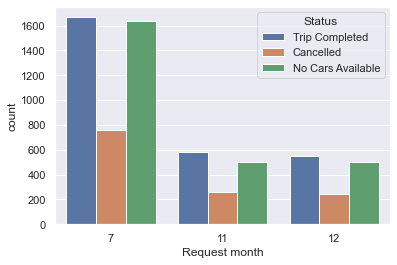

In [104]:
sns.countplot('Request month',data=dataset,hue='Status')

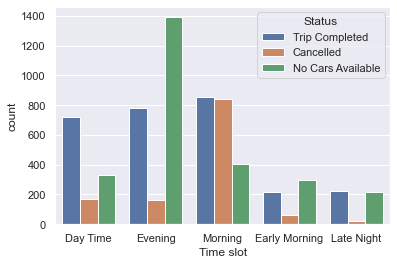

In [122]:
sns.countplot('Time slot',data=dataset,hue='Status')

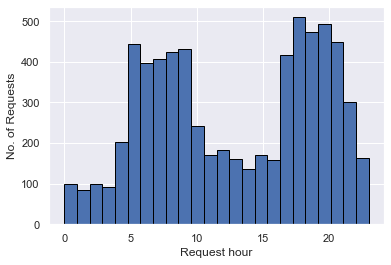

In [106]:
plt.hist(dataset["Request hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

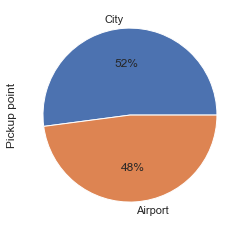

In [116]:
dataset["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

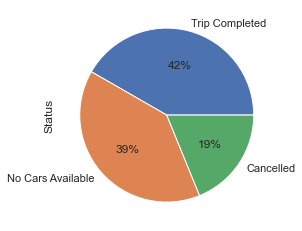

In [117]:
dataset["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

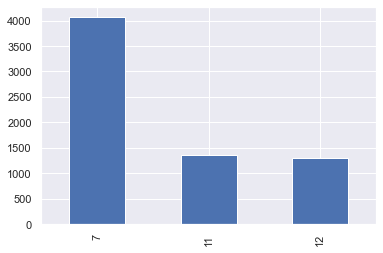

In [109]:
dataset["Request month"].value_counts().plot.bar()
plt.show()


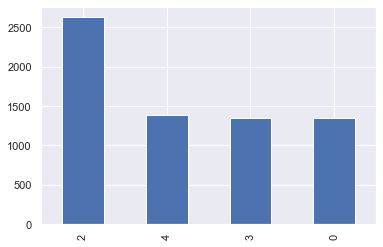

In [110]:
dataset["Request dayofweek"].value_counts().plot.bar()
plt.show()


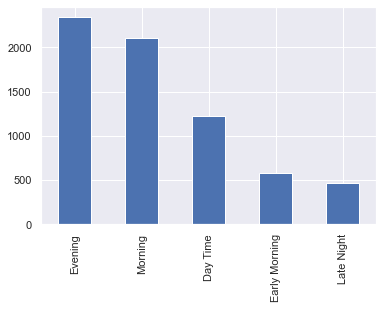

In [121]:
dataset['Time slot'].value_counts().plot.bar()
plt.show()


In [114]:
#brief of the data summary
dataset['Trip_Duration'].describe()

count                      2799
mean     0 days 00:52:22.743837
std      0 days 00:13:51.086918
min             0 days 00:20:47
25%             0 days 00:41:00
50%             0 days 00:52:02
75%             0 days 01:04:00
max             0 days 01:23:00
Name: Trip_Duration, dtype: object

## Comment: From the data the min trip duration is 20 min and max trip 1:23 min

In [145]:
# Grouping by pickup point ranking 
uni_rate=dataset.groupby(by='Pickup point')['Trip_Duration'].describe()
uni_rate

,count,mean,std,min,25%,50%,75%,max
Pickup point,,,,,,,,
Airport,1306,00:52:12.765696,00:13:50.725326,00:21:11,00:41:00,00:51:33.500000,01:04:00,01:22:04
City,1493,00:52:31.472203,00:13:51.583191,00:20:47,00:41:00,00:52:59,01:03:46,01:23:00


## Comment: It shows even by seperated by pickup point for the data the min and max trip duration almost the same

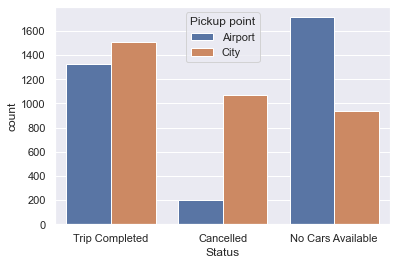

In [21]:
sns.countplot('Status',data=dataset,hue='Pickup point')

In [144]:
# Grouping by pickup point ranking 
uni_rate=dataset.groupby(by='Time slot')['Trip_Duration'].describe()
uni_rate

,count,mean,std,min,25%,50%,75%,max
Time slot,,,,,,,,
Day Time,722,00:52:23.739612,00:13:42.419237,00:20:47,00:41:00.500000,00:52:01,01:04:00,01:22:04
Early Morning,214,00:53:50.602803,00:14:24.224467,00:26:15,00:41:57,00:54:03.500000,01:06:28.500000,01:22:54
Evening,784,00:51:54.029336,00:13:43.332758,00:22:00,00:40:42.500000,00:51:33,01:03:00,01:23:00
Late Night,225,00:52:04.986666,00:13:54.540279,00:24:43,00:41:00,00:52:28,01:02:34,01:20:00
Morning,854,00:52:30.925058,00:13:56.331523,00:21:00,00:40:54.500000,00:52:50.500000,01:04:40.750000,01:21:00


## Comment: From the above you see that:
- Most of the requested and trips are distrbuted in the Morining, day time and Evening and very less in the late nigght and Early morning

- The trip duration min and max independeant on Time slot and pickup point ( No trafic in this city or even in the Airport during full day)

- The most trip doen on Wednesday (Mid of the week) and no trip on Sutrday and Sunday as weekend and not working day 

- As still there is clear issue in the availability of the cars during cancelled trip but it is more inside the city than on the Airport so need more cars on the Airport.

- Cancelled Trip are huge number and more in the city than on the Airport can be result also for long wait time for the People inside city and lead to take anther transportation option.